In [68]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
data.head()

,x1,x2,y
0,0.0323,0.0244,1
1,0.0887,0.0244,1
2,0.1690,0.0163,1
3,0.2420,0.0000,1
4,0.2420,0.0488,1


In [69]:
x = data.drop('y', axis=1)
x1 = x.loc[:, 'x1']
x2 = x.loc[:, 'x2']
y = data.loc[:, 'y']
x.head()

,x1,x2
0,0.0323,0.0244
1,0.0887,0.0244
2,0.1690,0.0163
3,0.2420,0.0000
4,0.2420,0.0488


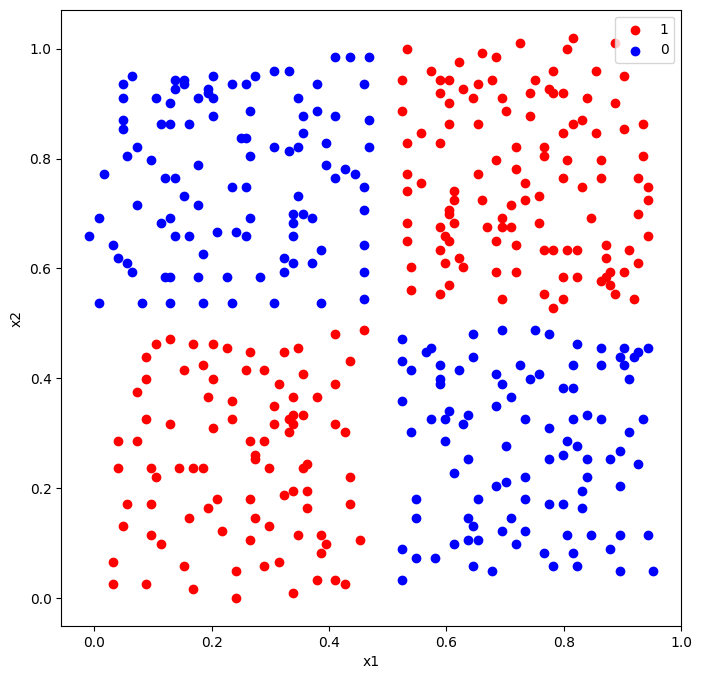

In [70]:
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(8, 8))
plt.scatter(x1[y == 1], x2[y == 1], color='red', label='1')
plt.scatter(x1[y == 0], x2[y == 0], color='blue', label='0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)
print(x_train.shape, x_test.shape, x.shape)

(275, 2) (136, 2) (411, 2)


In [72]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input

mlp = Sequential()
mlp.add(Input(shape=(2,)))
mlp.add(Dense(20, activation='sigmoid'))
mlp.add(Dense(1, activation='sigmoid'))
mlp.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
mlp.fit(x_train, y_train, epochs=3000)

Epoch 1/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - accuracy: 0.5150 - loss: 0.7156
Epoch 2/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5157 - loss: 0.7039 
Epoch 3/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 0.7016 
Epoch 4/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5025 - loss: 0.6978 
Epoch 5/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.5324 - loss: 0.6903  
Epoch 6/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5462 - loss: 0.6863 
Epoch 7/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4659 - loss: 0.6892 
Epoch 8/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.4863 - loss: 0.6896
Epoch 9/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4732 - loss: 0.6912 
Epoch 10/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4380 - loss: 0.6942 
Epoch 11/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4937 - loss: 0.6921 
Epoch 12/3000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [75]:
from sklearn.metrics import accuracy_score

y_train_pred = (mlp.predict(x_train) > 0.5).astype(int)
y_test_pred = (mlp.predict(x_test) > 0.5).astype(int)
print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train accuracy: 0.8945454545454545
Test accuracy: 0.8897058823529411


In [76]:
y_train_pred_form = pd.Series(y_train_pred.flatten())

In [88]:
xx, yy = np.meshgrid(np.arange(x1.min()-0.01, x1.max()+0.01, 0.01), np.arange(x2.min()-0.01, x2.max()+0.01, 0.01))
x_range = np.c_[xx.ravel(), yy.ravel()]
y_range_pred = (mlp.predict(x_range) > 0.5).astype(int)
y_range_pred_form = pd.Series(y_range_pred.flatten())

322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


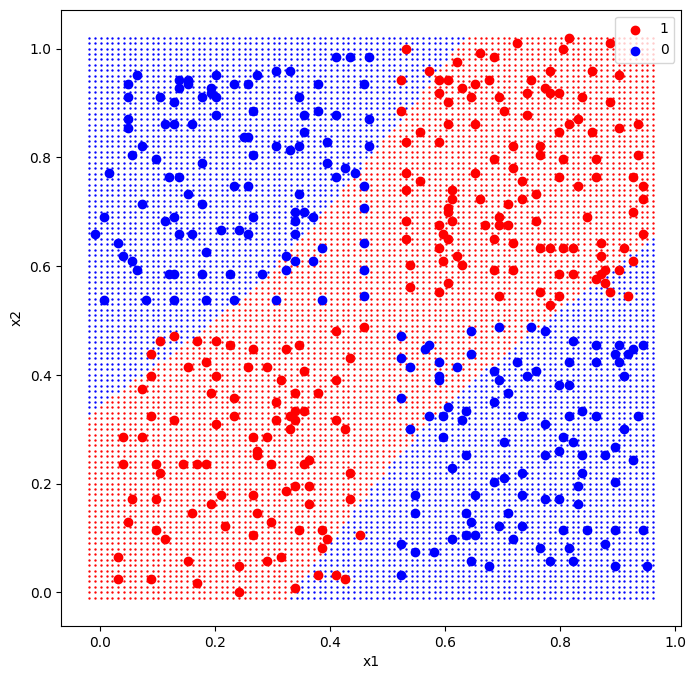

In [89]:
fig2 = plt.figure(figsize=(8, 8))
plt.scatter(x_range[:, 0][y_range_pred_form == 1], x_range[:, 1][y_range_pred_form == 1], color='red', s=0.5)
plt.scatter(x_range[:, 0][y_range_pred_form == 0], x_range[:, 1][y_range_pred_form == 0], color='blue', s=0.5)

plt.scatter(x1[y == 1], x2[y == 1], color='red', label='1')
plt.scatter(x1[y == 0], x2[y == 0], color='blue', label='0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()